In [1]:
import pandas as pd
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

### Load CSV data

In [73]:
# Reading demographic csv
demo_df = pd.read_csv('../Dataset/Demographic_CSV/DEMO.csv')

# Reading examination csv
ex_df = pd.read_csv('../Dataset/Examination_CSV/BMX_J.csv')

# Loading the lab csv files 
lab_csv_directory = "../Dataset/Lab_CSV"
lab_dfs = {}
for filename in os.listdir(lab_csv_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(lab_csv_directory, filename)
        df = pd.read_csv(file_path)
        lab_dfs[filename[:-4]] = df
print('Lab dataframes: ',sorted(lab_dfs.keys()))

# Loading the questionnaire csv files 
q_csv_directory = "../Dataset/Questionnaire_CSV"
q_dfs = {}
for filename in os.listdir(q_csv_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(q_csv_directory, filename)
        df = pd.read_csv(file_path)
        q_dfs[filename[:-4]] = df
print('\nQuestionnaire dataframes: ',sorted(q_dfs.keys()))

Lab dataframes:  ['BIOPRO_J', 'CBC_J', 'COT_J', 'CRCO_J', 'FERTIN_J', 'FETIB_J', 'GHB_J', 'GLU_J', 'HDL_J', 'HEPA_J', 'HEPBD_J', 'HSCRP_J', 'INS_J', 'PBCD_J', 'TCHOL_J', 'TFR_J', 'TRIGLY_J', 'VIC_J', 'VID_J', 'VITAEC_J']

Questionnaire dataframes:  ['DIQ_J', 'HEQ_J', 'KIQ_U_J', 'MCQ_J', 'RHQ_J']


### Demographic and Examination Data Analysis

In [3]:
demo_df.shape

(9254, 3)

In [4]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent ID  9254 non-null   float64
 1   Gender         9254 non-null   float64
 2   Age            9254 non-null   float64
dtypes: float64(3)
memory usage: 217.0 KB


In [5]:
demo_df.describe()

,Respondent ID,Gender,Age
count,9254.000000,9254.000000,9254.000000
mean,98329.500000,1.507564,34.334234
std,2671.544029,0.499970,25.500280
min,93703.000000,1.000000,0.000000
25%,96016.250000,1.000000,11.000000
50%,98329.500000,2.000000,31.000000
75%,100642.750000,2.000000,58.000000
max,102956.000000,2.000000,80.000000


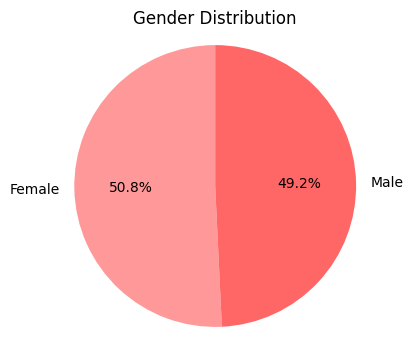

In [6]:
# Occurrences of each gender
gender_counts = demo_df['Gender'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=['Female', 'Male'], colors=['#FF9999', '#FF6666'],
        autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

# We have an almost equal distribution of male and female respondents

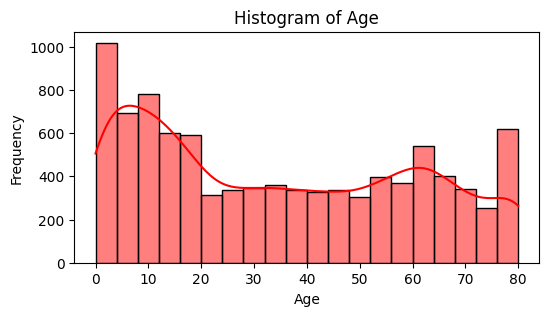

In [24]:
# Age distribution
# Ages 80 and above are marked as 80
plt.figure(figsize=(6, 3))
sns.histplot(data=demo_df, x="Age", bins=20, kde=True, color='red')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [29]:
print(demo_df['Age'].value_counts())
print('\nZero Ages (to be removed): ',demo_df['Age'].value_counts()[0])
# We see that there are some values with age = 0. These shall be removed later.

80.0    427
0.0     357
2.0     242
1.0     234
10.0    199
       ... 
75.0     60
77.0     53
76.0     49
78.0     47
79.0     45
Name: Age, Length: 81, dtype: int64

Zero Ages (to be removed):  357


In [9]:
ex_df.shape

(8704, 2)

In [10]:
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent ID  8704 non-null   float64
 1   BMI            8005 non-null   float64
dtypes: float64(2)
memory usage: 136.1 KB


In [11]:
ex_df.describe()

,Respondent ID,BMI
count,8704.000000,8005.000000
mean,98315.452091,26.577502
std,2669.112899,8.260724
min,93703.000000,12.300000
25%,96000.750000,20.400000
50%,98308.500000,25.800000
75%,100625.250000,31.300000
max,102956.000000,86.200000


In [34]:
ex_df.isnull().sum()

Respondent ID      0
BMI              699
dtype: int64

In [74]:
lab_df = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), lab_dfs.values())
lab_df.head()

,Respondent ID,25-hydroxyvitamin D2 + D3 [nmol/L],Fasting Glucose [mmol/L],Insulin [pmol/L],Triglyceride [mmol/L],LDL-Cholesterol(NIH2) [mmol/L],Vitamin C [umol/L],Hepatitis A antibody,Alanine Aminotransferase [U/L],Albumin [g/dL],...,Total Lycopene [umol/L],Retinol [umol/L],Alpha-tocopherol [umol/L],Blood lead [umol/L],Blood cadmium [nmol/L],Blood mercury [nmol/L],Blood selenium [umol/L],Blood manganese [nmol/L],Transferrin receptor [nmol/L],Glycohemoglobin [%]
0,93703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,74.4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.62,2.35,1.81,171.28,30.6,NaN
2,93705.0,89.9,NaN,NaN,NaN,NaN,73.8,1.0,16.0,4.4,...,0.386,2.185,26.006,0.14,2.14,5.34,2.36,155.99,39.8,6.2
3,93706.0,53.8,NaN,NaN,NaN,NaN,63.6,2.0,10.0,4.4,...,0.583,2.042,16.765,0.04,1.87,53.09,2.53,256.10,34.0,5.2
4,93707.0,58.2,NaN,NaN,NaN,NaN,27.4,2.0,13.0,5.2,...,0.499,1.222,22.756,0.02,1.25,1.00,2.28,229.35,34.0,5.6


In [75]:
q_df = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), q_dfs.values())
q_df.head()

,Respondent ID,Hepatitis C,Congestive_Heart_Failure,Coronary_Heart_Disease,Stroke,Thyroid_Problem,Liver_Condition,Fatty_Liver,Liver_Fibrosis,Liver_Cirrhosis,...,Jaundice,Cancer,Cancer_Type,Anemia,Heart_Attack,Weak/Failing kidneys,Pregnancy,No. of pregnancies,Gestational diabetes,Diabetes
0,93705.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0
1,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2,93707.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
3,93708.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,NaN,3.0,1.0,3.0
4,93709.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0


In [76]:
# We have Hepatitis A and B in lab dataset and pregnancy data in questionnaire dataset. 
# We could swap them so that all the diseases stay in the questionnaire data and others in the lab data.
q_df = q_df.merge(lab_df[["Respondent ID","Hepatitis A antibody","Hepatitis B core antibody"]], 
                  on='Respondent ID', how="outer")
lab_df.drop(["Hepatitis A antibody","Hepatitis B core antibody"], axis=1, inplace=True)

lab_df = lab_df.merge(q_df[["Respondent ID","Pregnancy","No. of pregnancies"]], 
                  on='Respondent ID', how="outer")
q_df.drop(["Pregnancy","No. of pregnancies"], axis=1, inplace=True)

In [16]:
lab_df.shape

(8897, 85)

In [49]:
lab_df.dtypes

Respondent ID                         float64
25-hydroxyvitamin D2 + D3 [nmol/L]    float64
Fasting Glucose [mmol/L]              float64
Insulin [pmol/L]                      float64
Triglyceride [mmol/L]                 float64
                                       ...   
Blood manganese [nmol/L]              float64
Transferrin receptor [nmol/L]         float64
Glycohemoglobin [%]                   float64
Pregnancy                             float64
No. of pregnancies                    float64
Length: 85, dtype: object

In [17]:
lab_df.describe()

,Respondent ID,25-hydroxyvitamin D2 + D3 [nmol/L],Fasting Glucose [mmol/L],Insulin [pmol/L],Triglyceride [mmol/L],LDL-Cholesterol(NIH2) [mmol/L],Vitamin C [umol/L],Alanine Aminotransferase [U/L],Albumin [g/dL],Alkaline Phosphatase [IU/L],...,Alpha-tocopherol [umol/L],Blood lead [umol/L],Blood cadmium [nmol/L],Blood mercury [nmol/L],Blood selenium [umol/L],Blood manganese [nmol/L],Transferrin receptor [nmol/L],Glycohemoglobin [%],Pregnancy,No. of pregnancies
count,8897.000000,7409.000000,2711.000000,2650.000000,2659.000000,2652.000000,6740.000000,5902.000000,5905.000000,5903.000000,...,6665.000000,6884.000000,7513.000000,7513.000000,7513.000000,7513.000000,6567.000000,6045.000000,668.000000,2115.000000
mean,98333.855794,66.912952,6.212328,85.453019,1.219948,2.820133,54.172769,21.420197,4.078645,90.616127,...,26.541641,0.052326,3.323755,5.702940,2.366016,187.774592,40.539759,5.769562,2.050898,3.545626
std,2671.896914,28.990528,1.983924,114.405872,1.130973,0.941858,30.014051,16.949439,0.345033,52.392677,...,10.045736,0.062403,4.479302,11.325116,0.334525,68.478743,22.314296,1.037838,0.932721,2.965295
min,93703.000000,9.960000,2.610000,4.260000,0.113000,0.517000,1.200000,2.000000,2.100000,16.000000,...,7.547000,0.000000,0.620000,1.000000,1.080000,28.580000,11.900000,3.800000,1.000000,1.000000
25%,96017.000000,47.400000,5.330000,38.400000,0.655000,2.172000,33.875000,12.000000,3.900000,64.000000,...,19.923000,0.020000,1.070000,1.000000,2.150000,141.070000,30.100000,5.200000,2.000000,2.000000
50%,98348.000000,63.700000,5.660000,60.060000,0.982000,2.715000,53.800000,17.000000,4.100000,79.000000,...,24.381000,0.040000,1.960000,2.540000,2.340000,176.740000,36.200000,5.500000,2.000000,3.000000
75%,100645.000000,81.600000,6.270000,97.545000,1.468000,3.388000,71.000000,25.000000,4.300000,98.000000,...,30.418000,0.060000,3.740000,5.590000,2.550000,220.790000,44.600000,5.900000,2.000000,5.000000
max,102956.000000,422.000000,25.000000,2910.600000,30.302000,9.284000,829.000000,420.000000,5.400000,638.000000,...,118.886000,2.050000,115.930000,317.560000,5.760000,946.500000,487.000000,16.200000,9.000000,77.000000


In [35]:
q_df.shape

(8897, 21)

In [50]:
q_df.dtypes

Hepatitis C                  float64
Congestive_Heart_Failure     float64
Coronary_Heart_Disease       float64
Stroke                       float64
Thyroid_Problem              float64
Liver_Condition              float64
Fatty_Liver                  float64
Liver_Fibrosis               float64
Liver_Cirrhosis              float64
Viral_Hepatitis              float64
Autoimmune_Hepatitis         float64
Jaundice                     float64
Cancer                       float64
Cancer_Type                  float64
Anemia                       float64
Heart_Attack                 float64
Weak/Failing kidneys         float64
Gestational diabetes         float64
Diabetes                     float64
Hepatitis A antibody         float64
Hepatitis B core antibody    float64
dtype: object

In [19]:
q_df.describe()

,Hepatitis C,Congestive_Heart_Failure,Coronary_Heart_Disease,Stroke,Thyroid_Problem,Liver_Condition,Fatty_Liver,Liver_Fibrosis,Liver_Cirrhosis,Viral_Hepatitis,...,Jaundice,Cancer,Cancer_Type,Anemia,Heart_Attack,Weak/Failing kidneys,Gestational diabetes,Diabetes,Hepatitis A antibody,Hepatitis B core antibody
count,7878.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,141.000000,6.0,24.0,50.0,...,7878.000000,5569.000000,588.000000,8897.000000,5569.000000,5569.000000,2113.000000,8897.000000,7137.000000,6794.000000
mean,2.014090,1.985276,1.972526,1.963548,1.900521,1.966062,16.290780,2.0,3.0,4.0,...,1.991622,1.896929,26.855442,1.973474,1.964087,1.971270,1.927118,1.923457,1.380272,1.940241
std,0.446082,0.430682,0.433178,0.368380,0.480752,0.428549,35.689242,0.0,0.0,0.0,...,0.339040,0.335527,13.862473,0.342530,0.367701,0.344133,0.344585,0.370457,0.485776,0.237677
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0,3.0,4.0,...,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.0,3.0,4.0,...,2.000000,2.000000,16.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.0,3.0,4.0,...,2.000000,2.000000,28.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.0,3.0,4.0,...,2.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2.0,3.0,4.0,...,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000


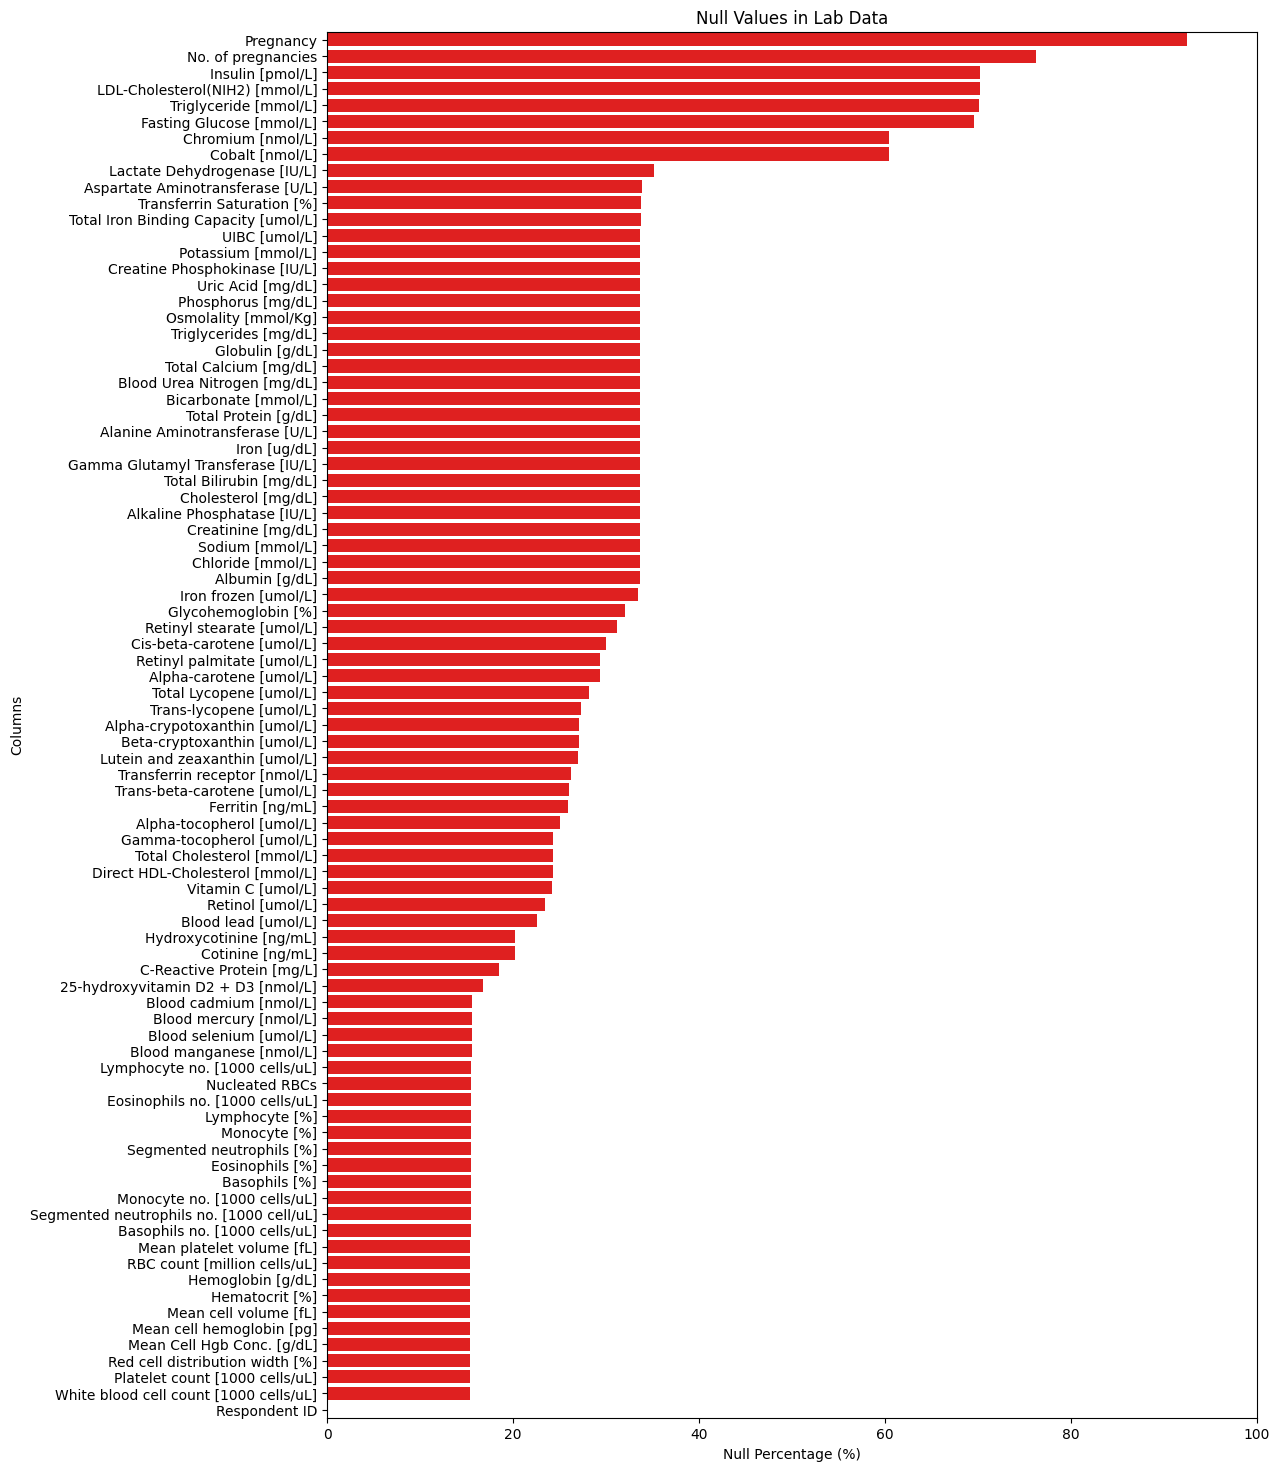

In [36]:
# Percentage of null values in each column of lab data
null_percentage = (lab_df.isnull().sum() / len(lab_df)) * 100

# DataFrame with column names and null percentages
null_data = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})

# DataFrame by null percentage in descending order
null_data = null_data.sort_values(by='Null Percentage', ascending=False)

# Bar plot
plt.figure(figsize=(12,18))
sns.barplot(x='Null Percentage', y='Column', data=null_data, color='red')

plt.xlabel('Null Percentage (%)')
plt.ylabel('Columns')
plt.title('Null Values in Lab Data')
plt.xlim(0, 100)
plt.show()

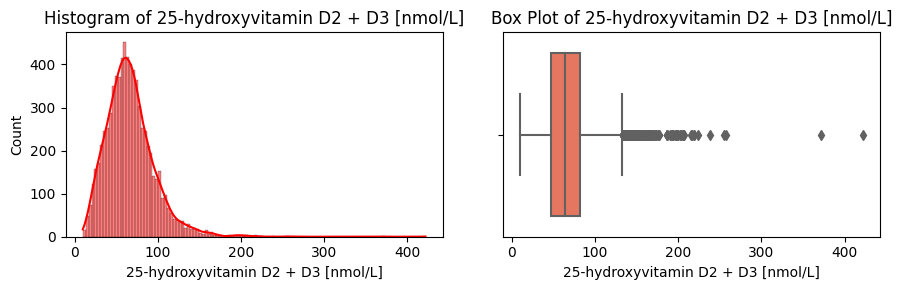

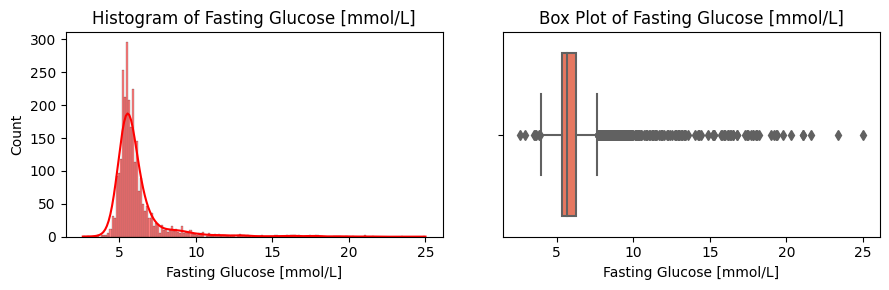

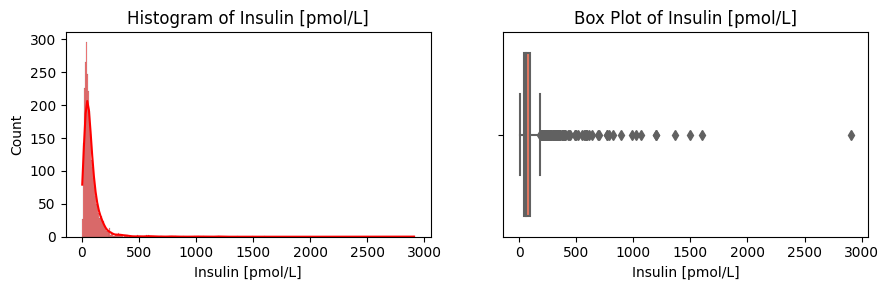

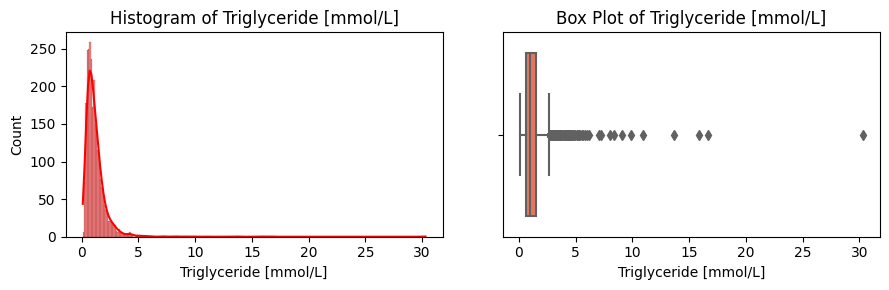

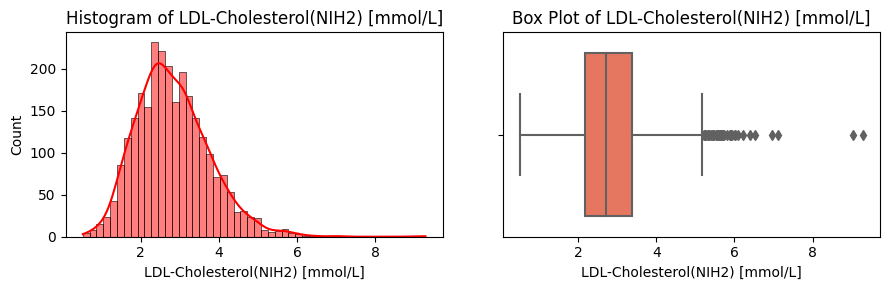

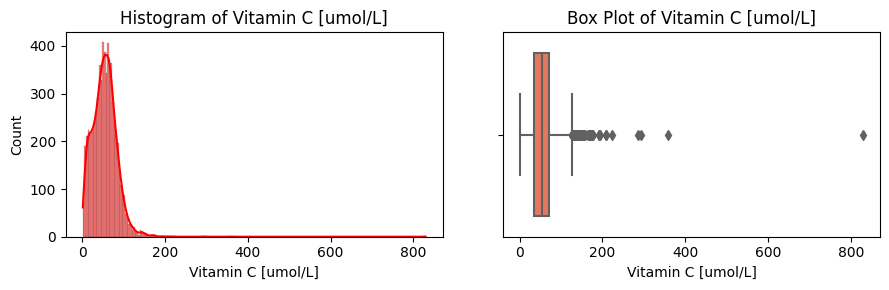

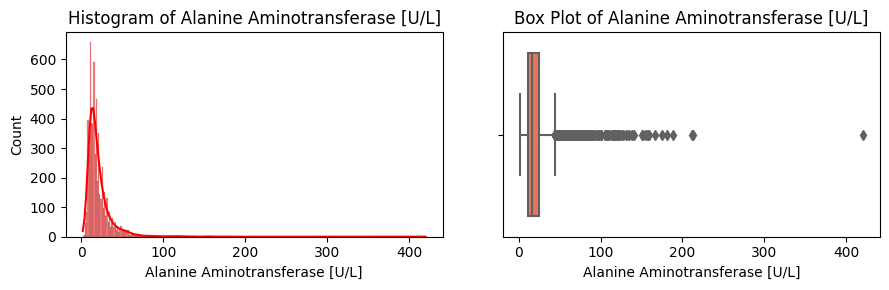

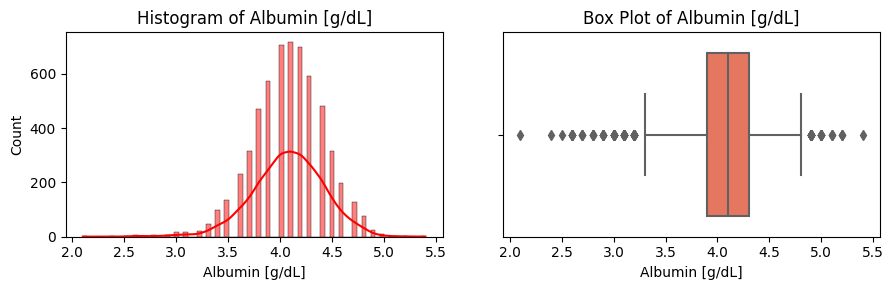

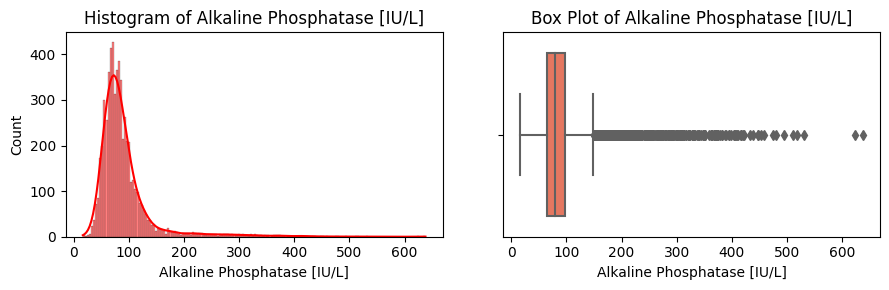

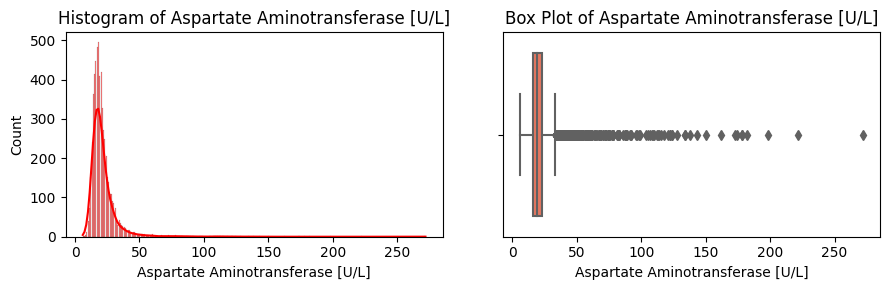

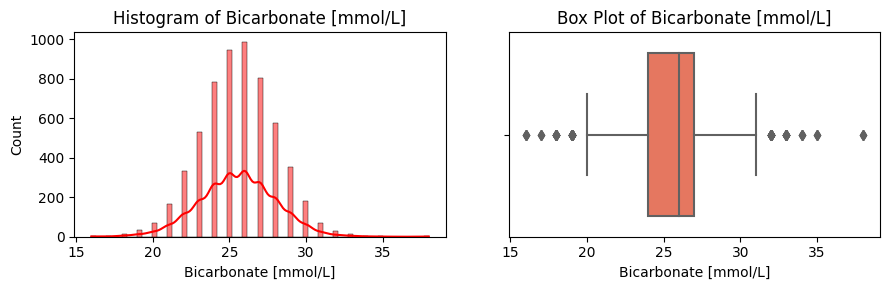

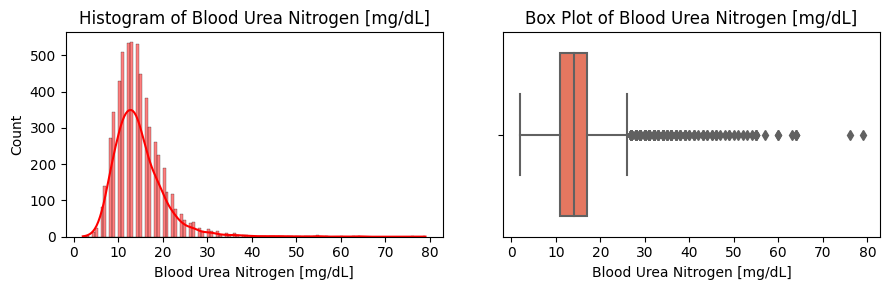

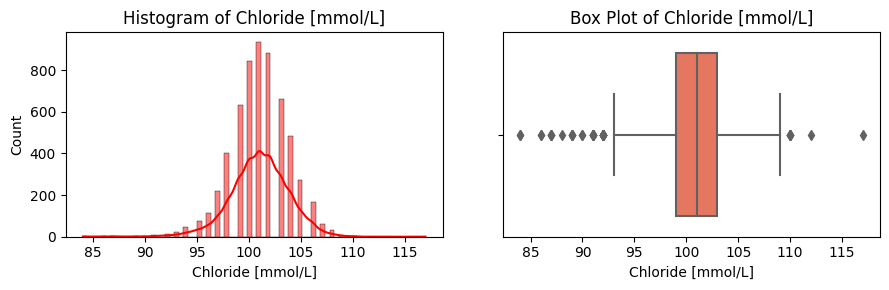

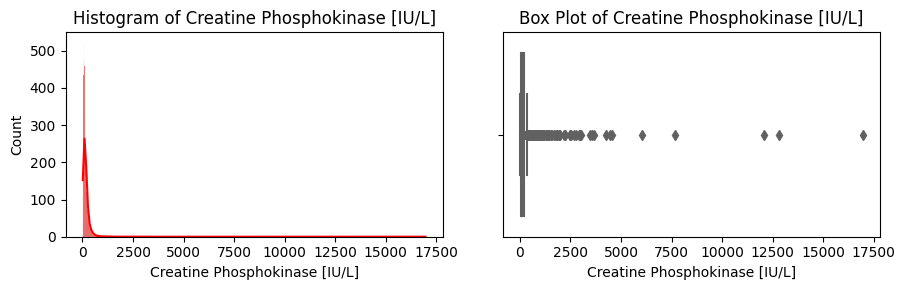

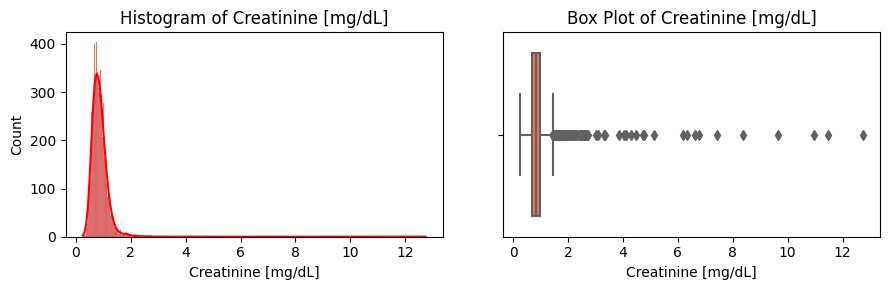

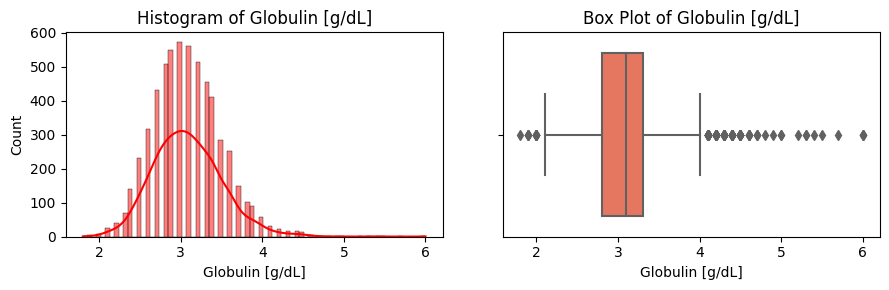

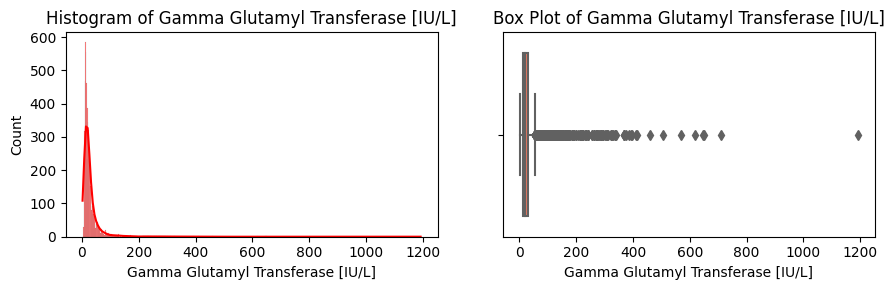

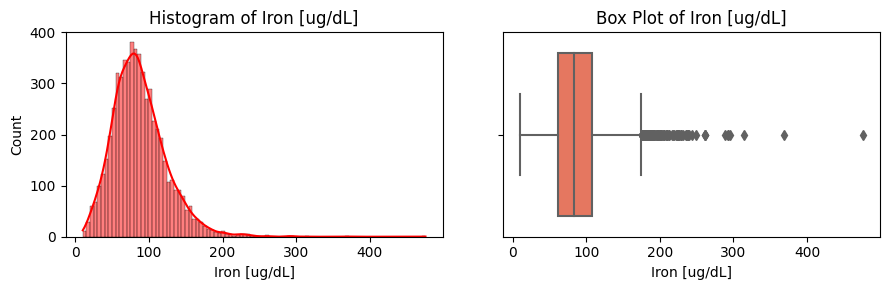

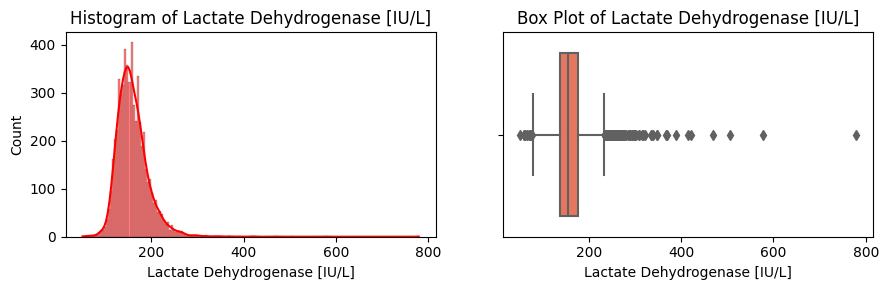

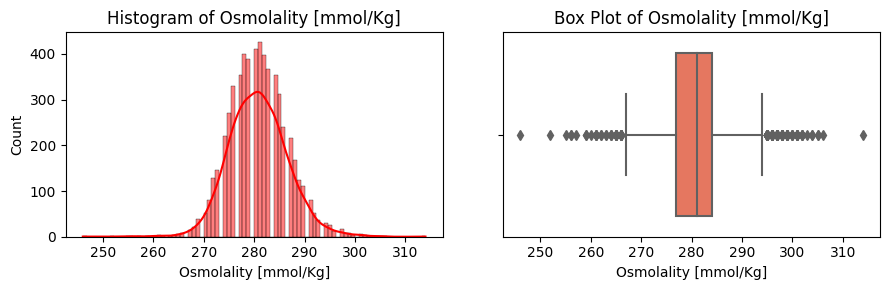

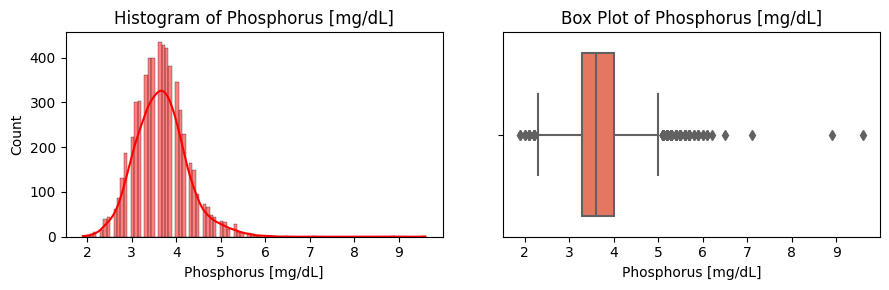

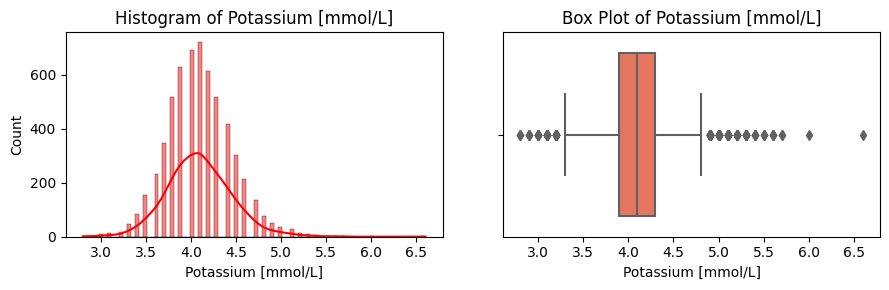

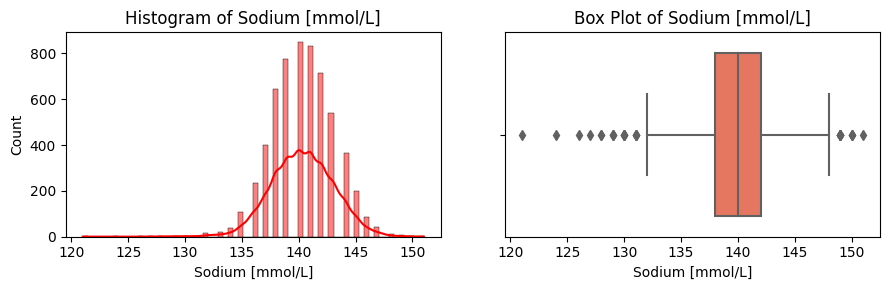

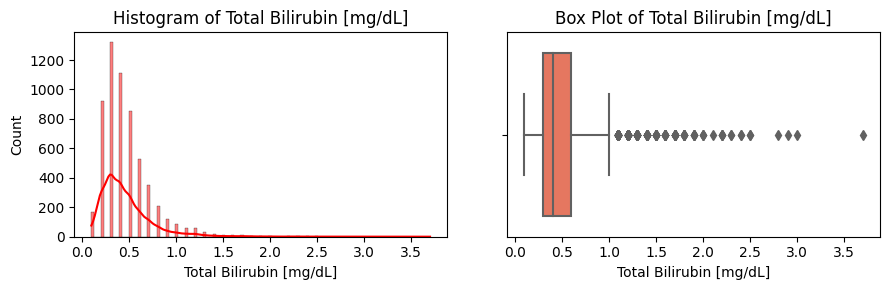

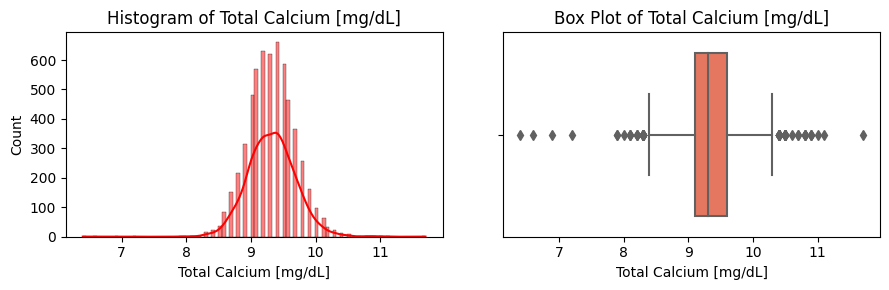

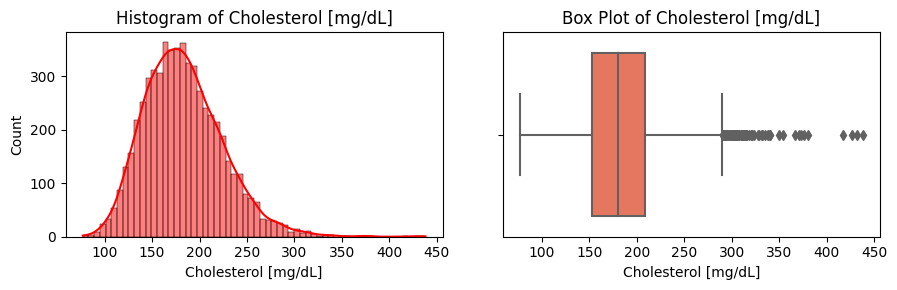

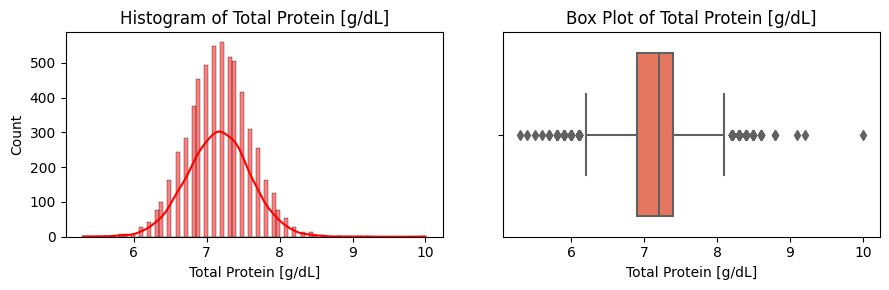

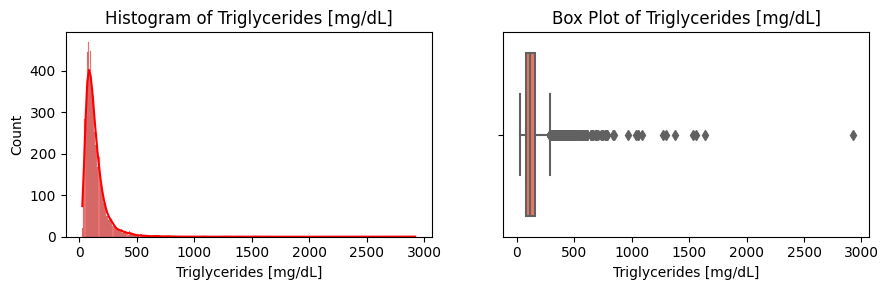

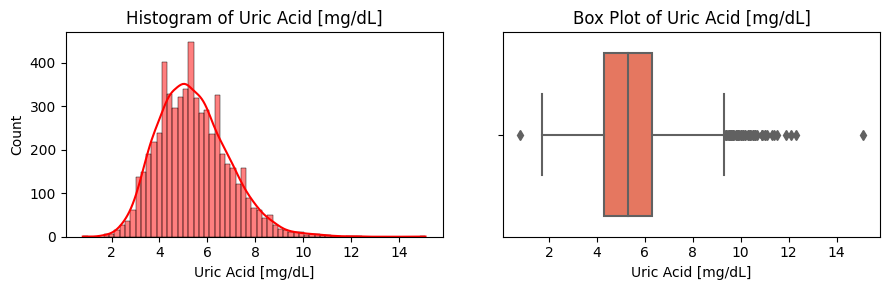

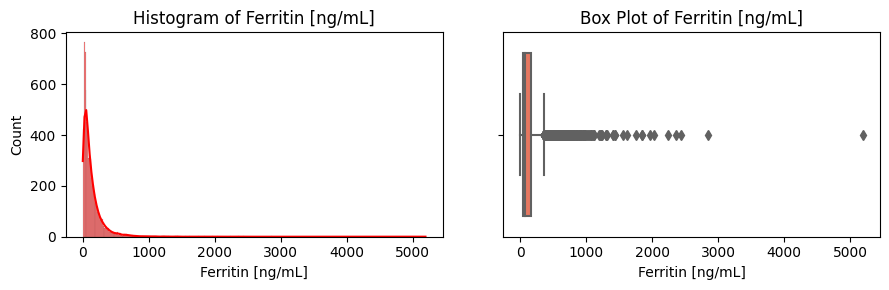

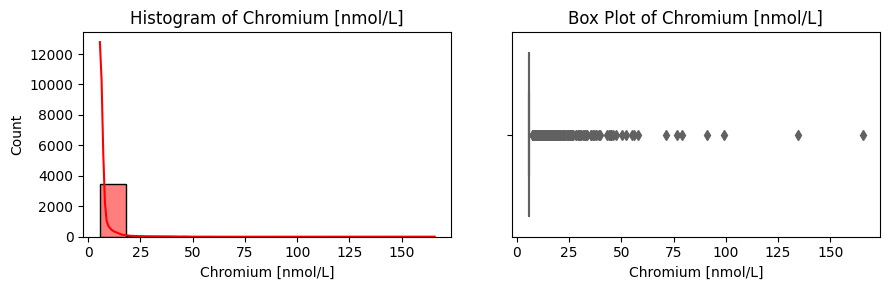

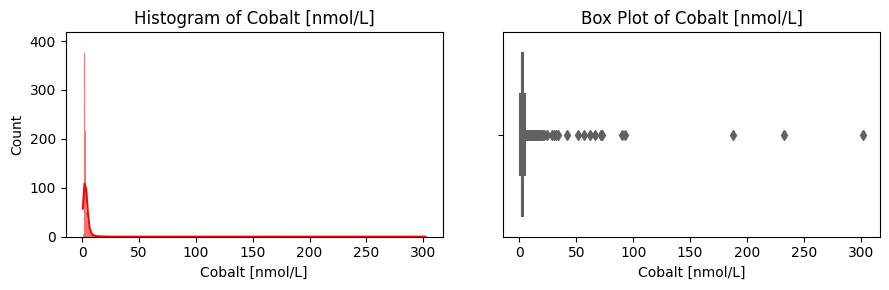

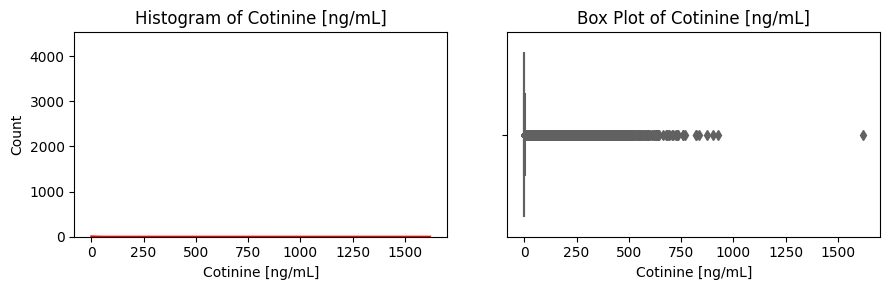

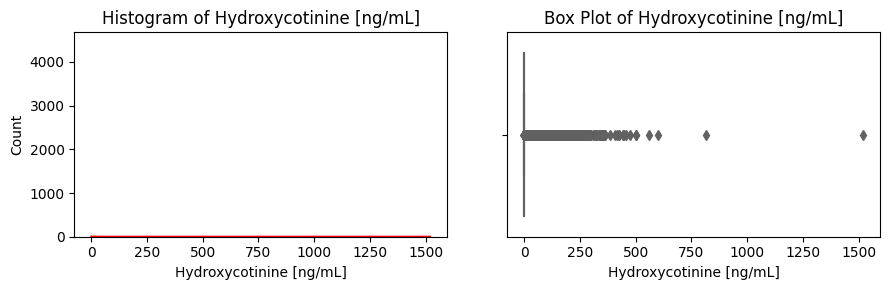

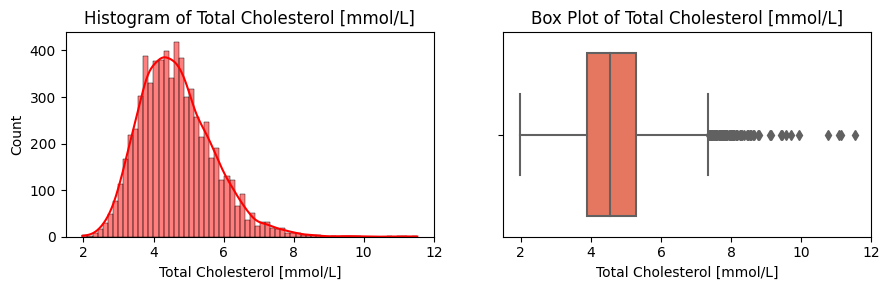

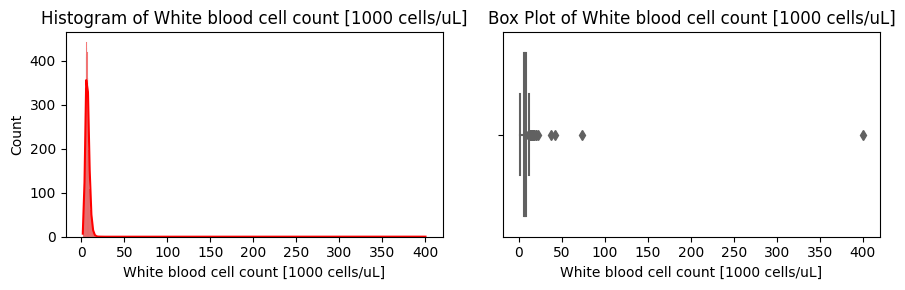

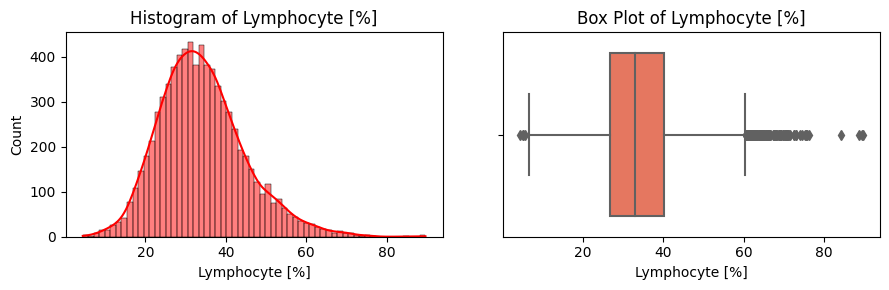

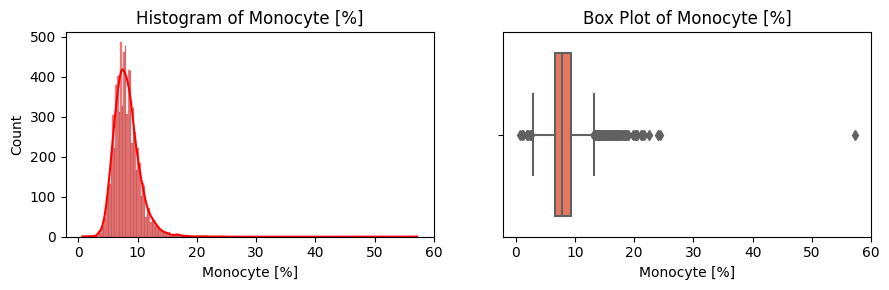

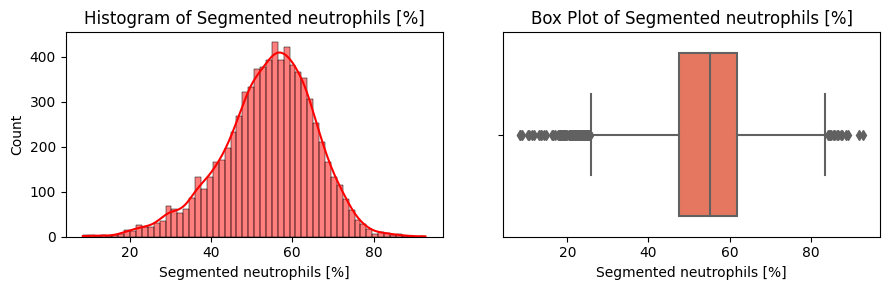

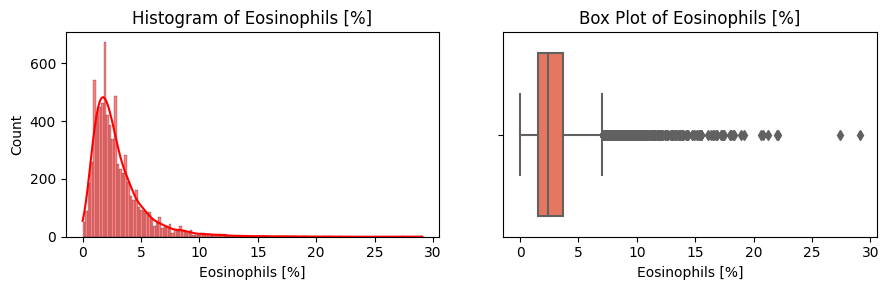

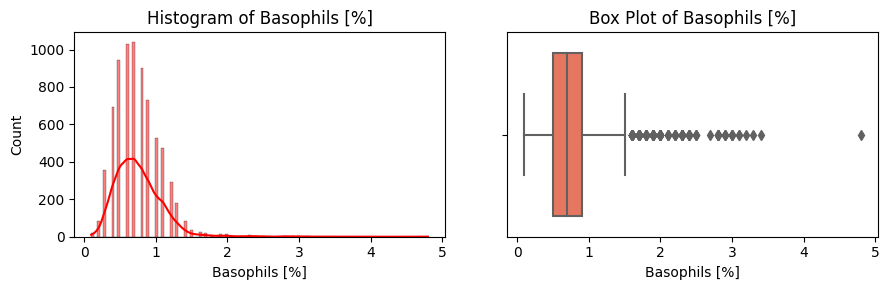

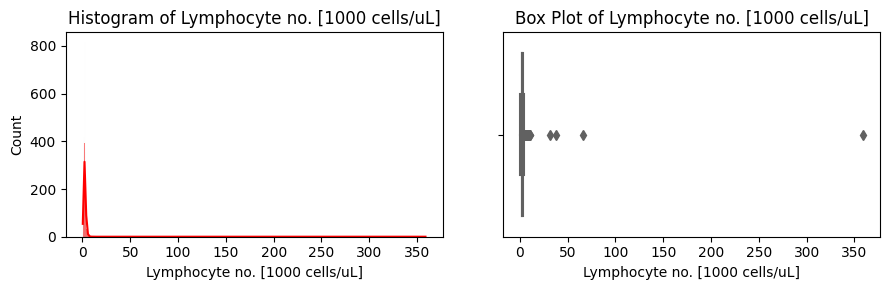

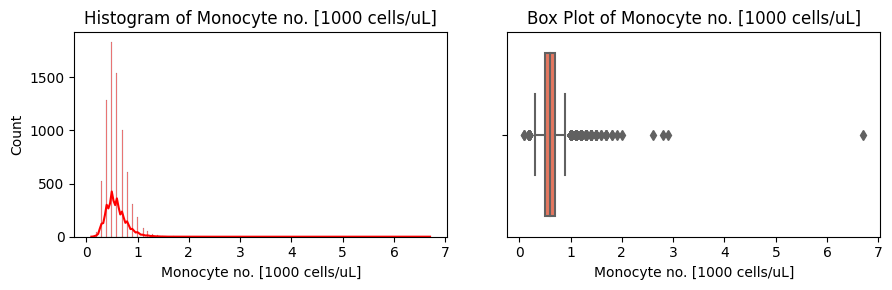

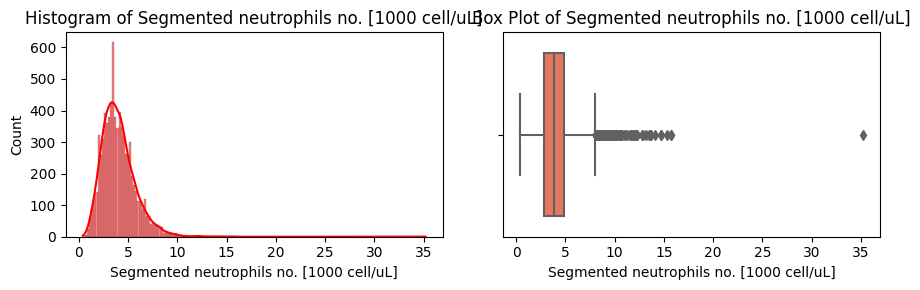

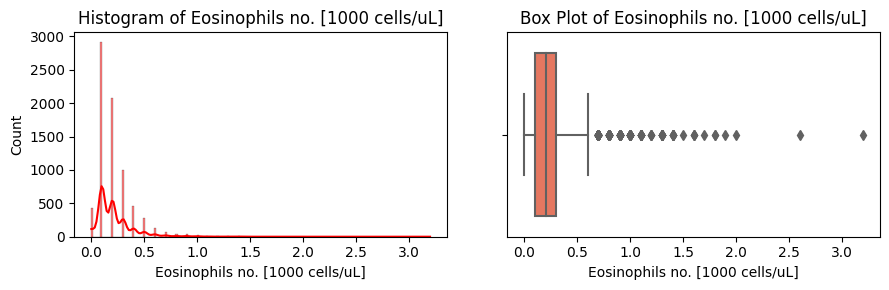

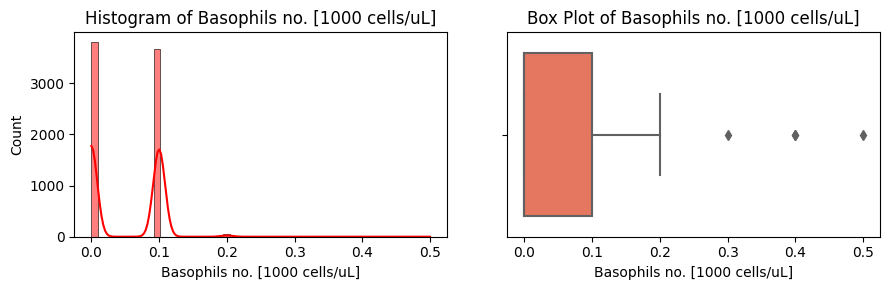

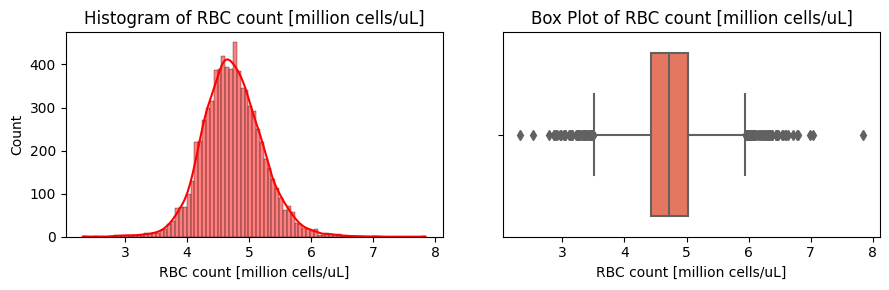

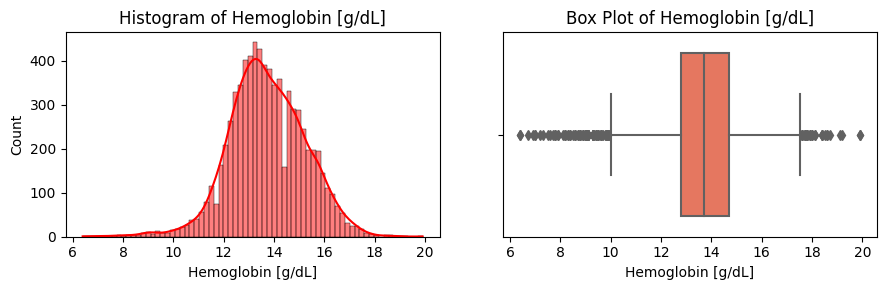

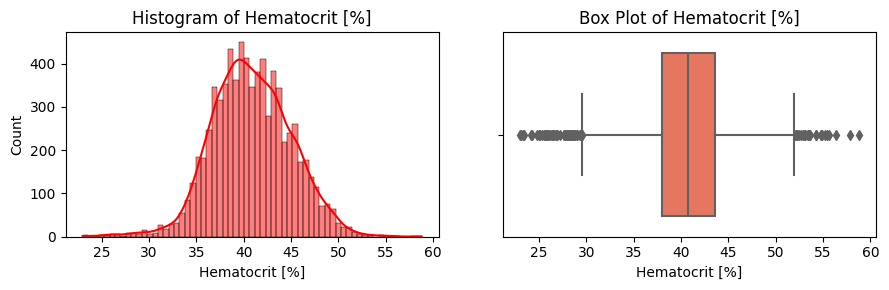

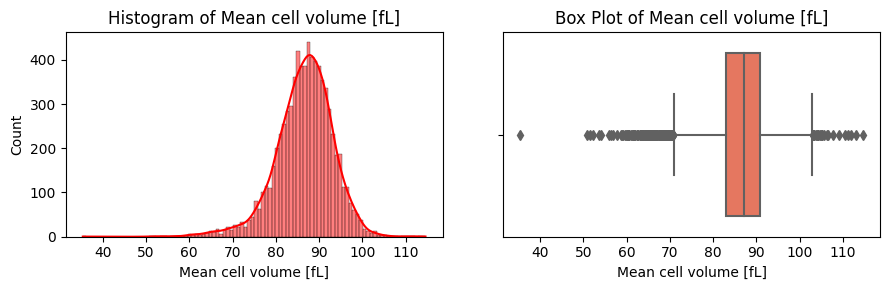

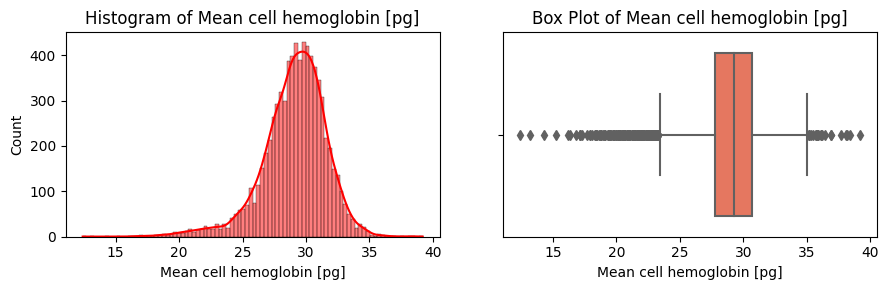

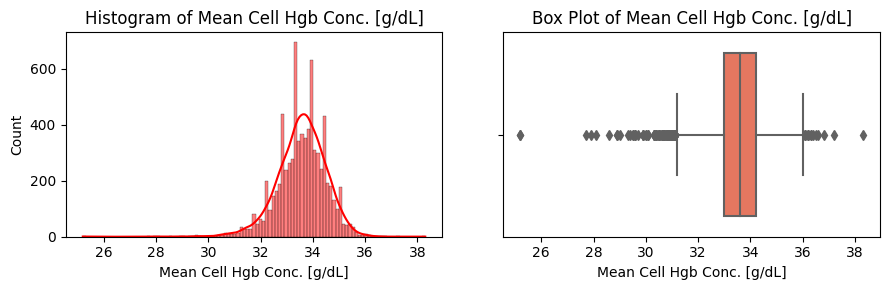

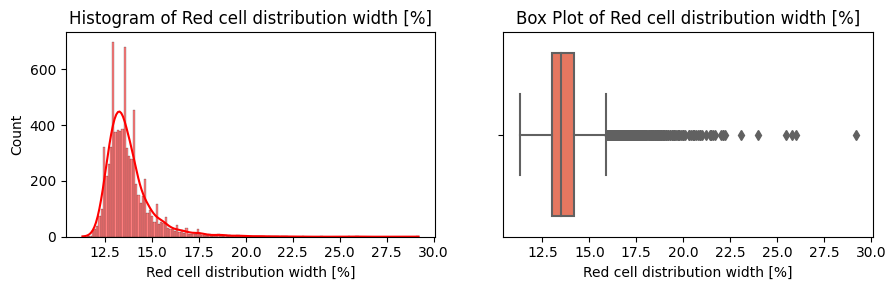

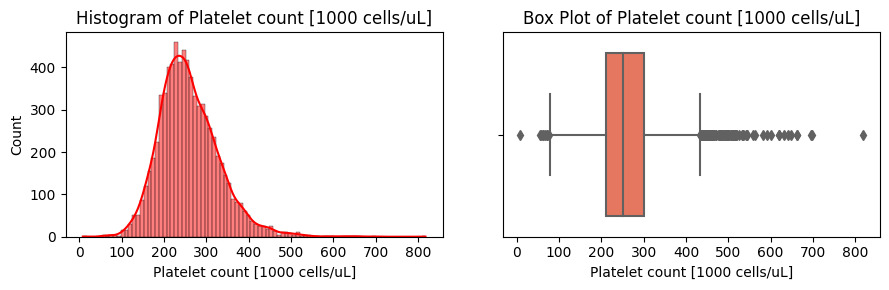

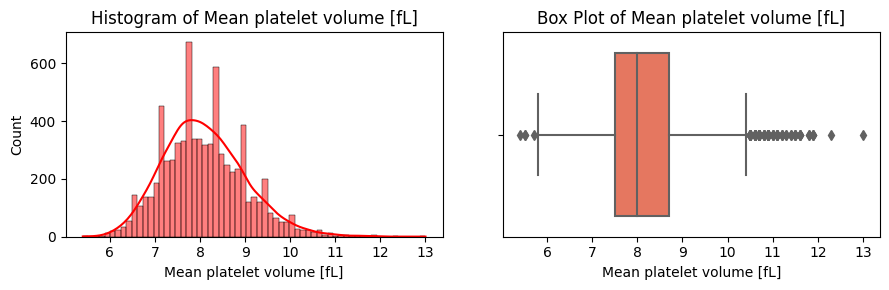

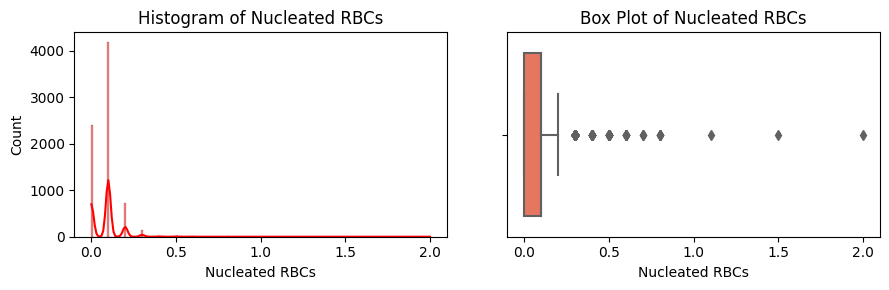

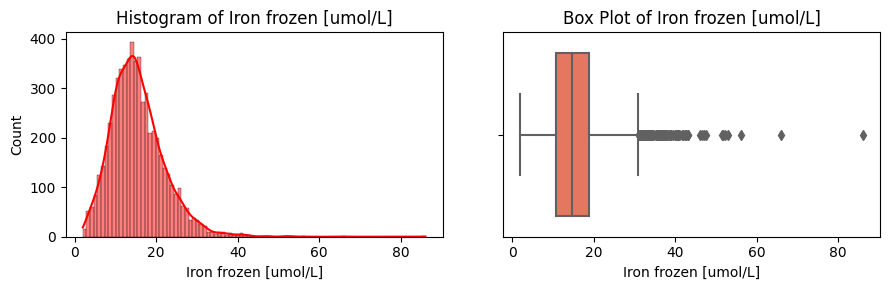

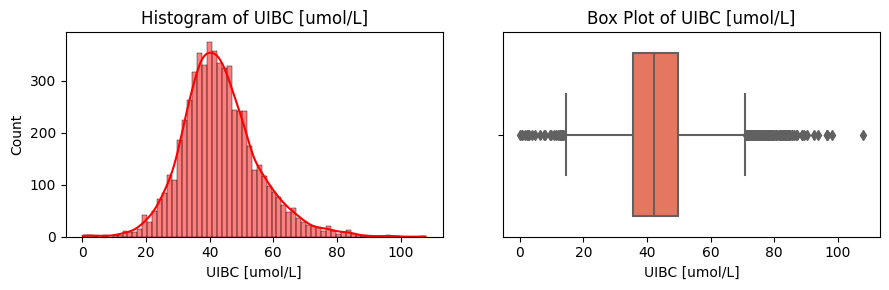

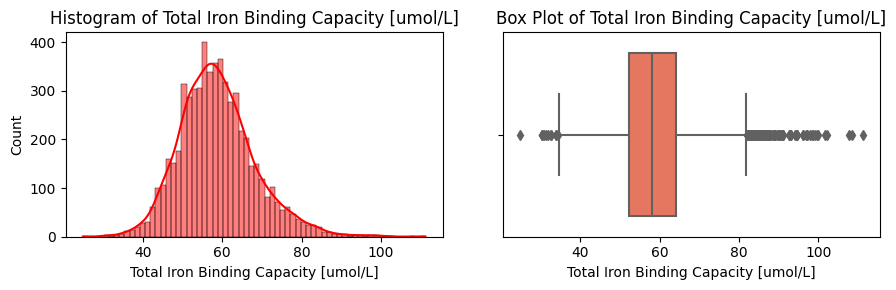

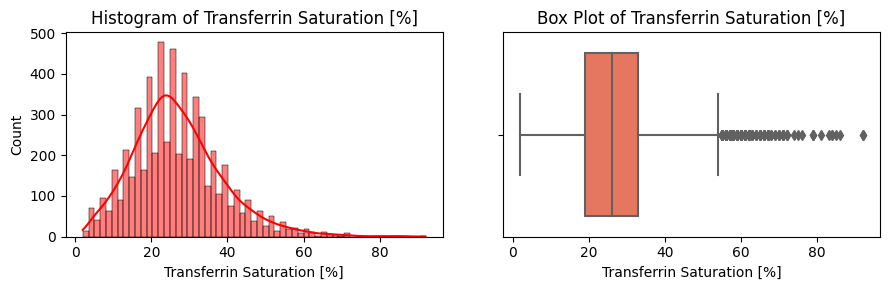

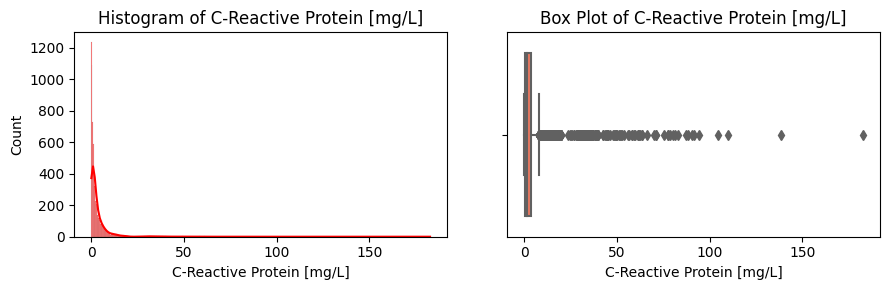

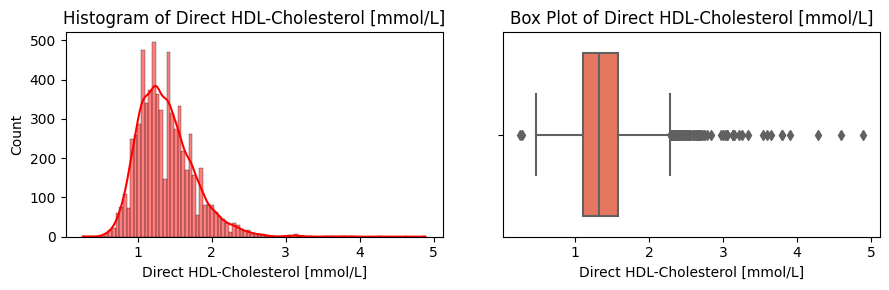

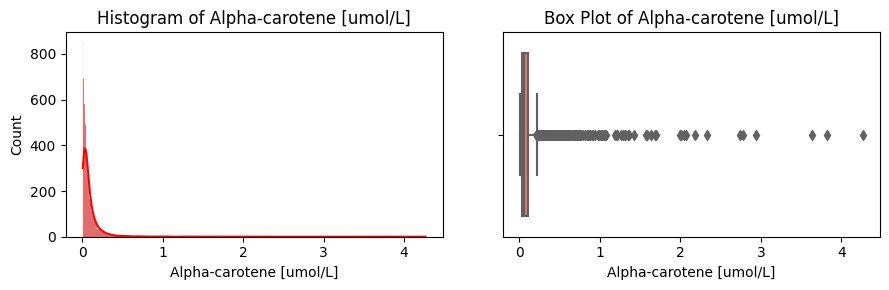

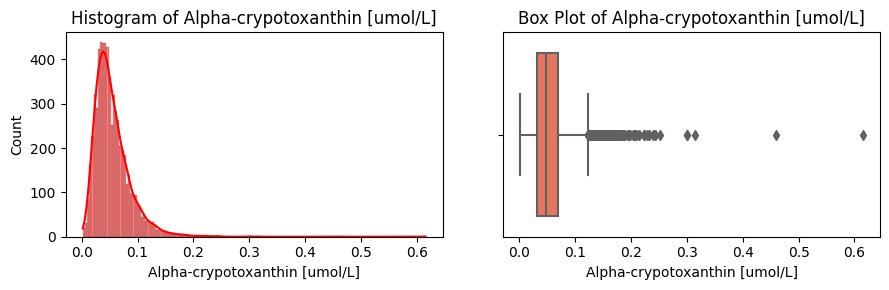

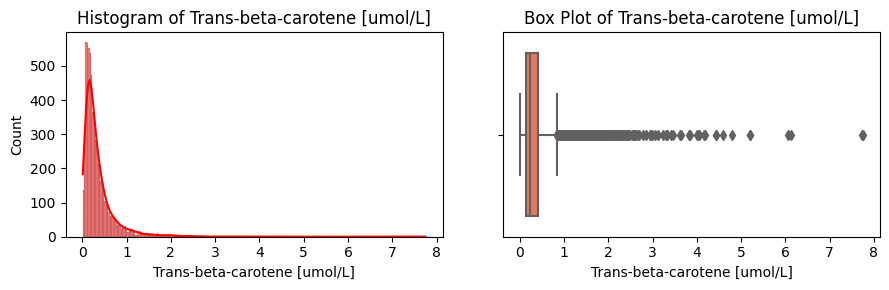

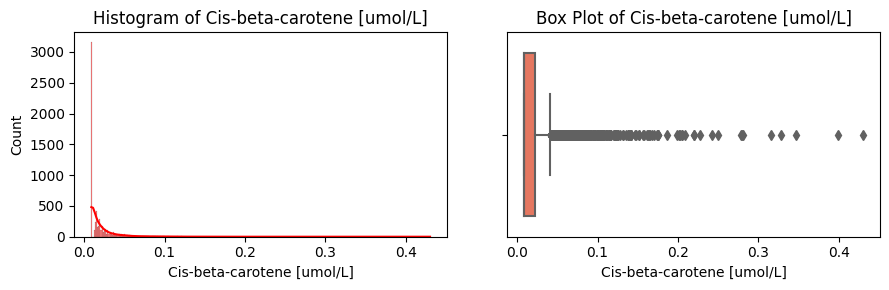

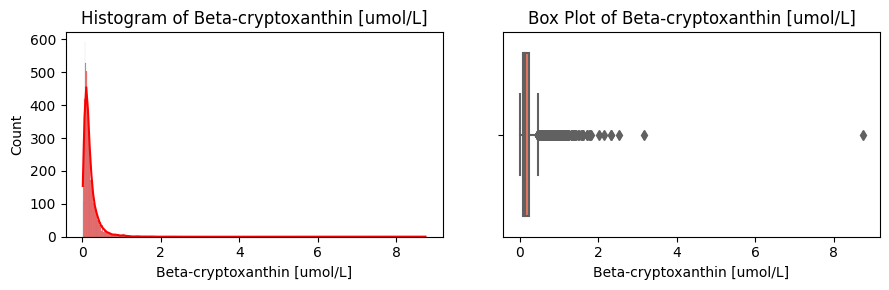

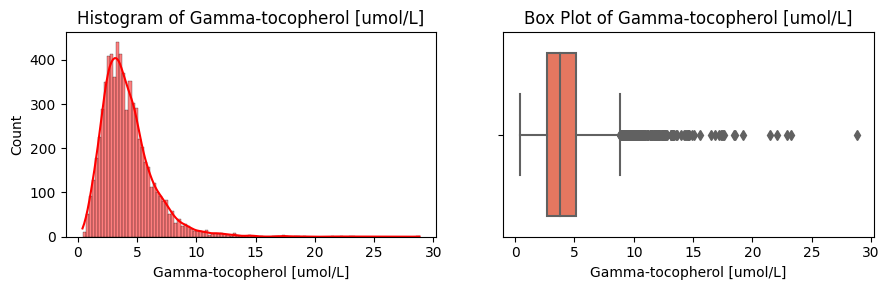

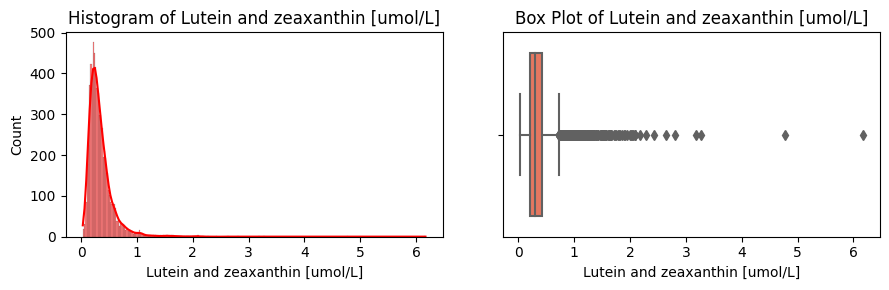

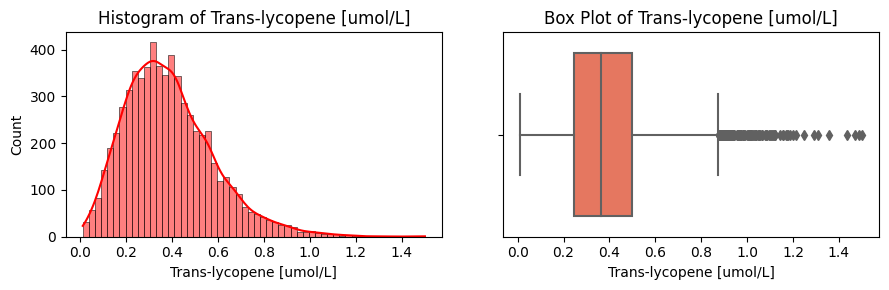

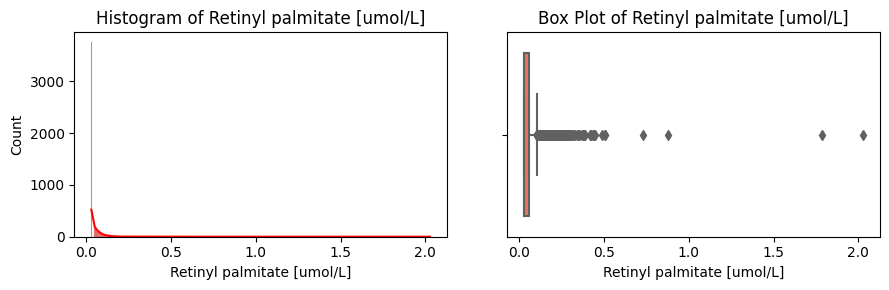

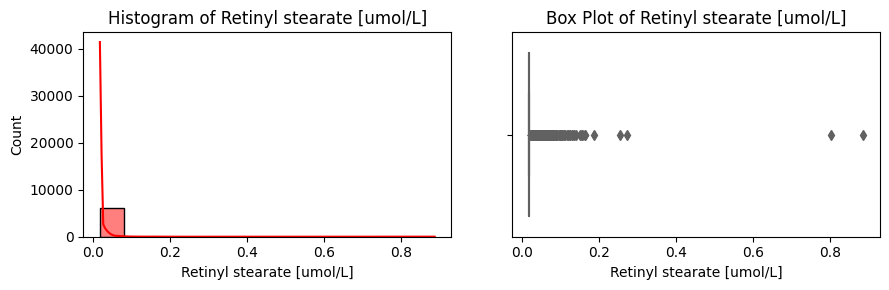

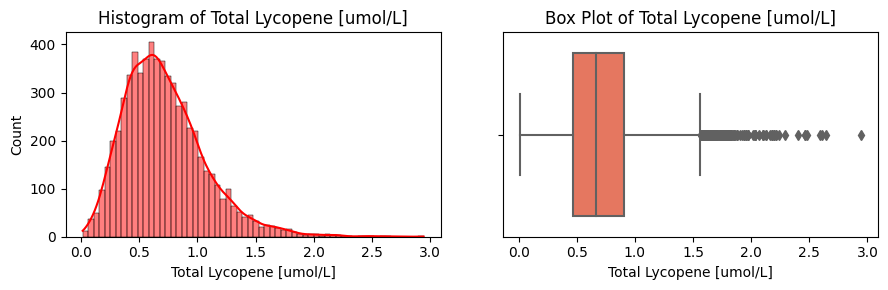

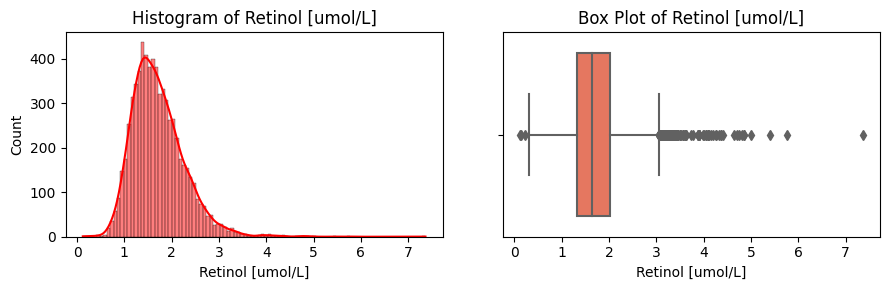

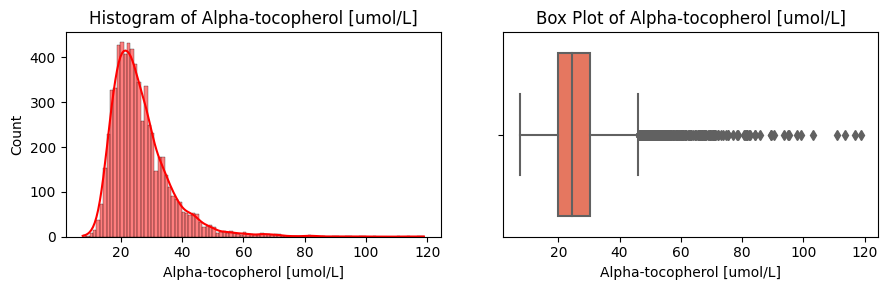

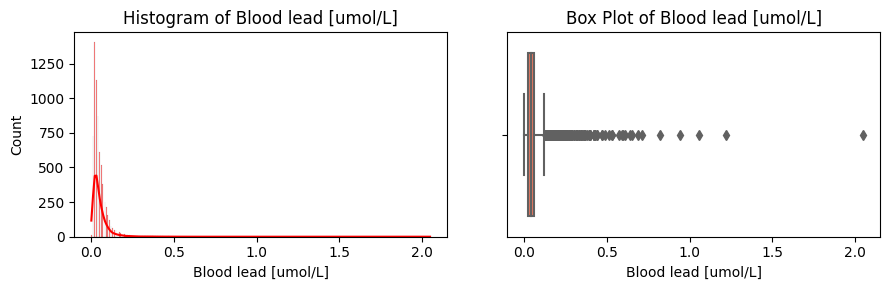

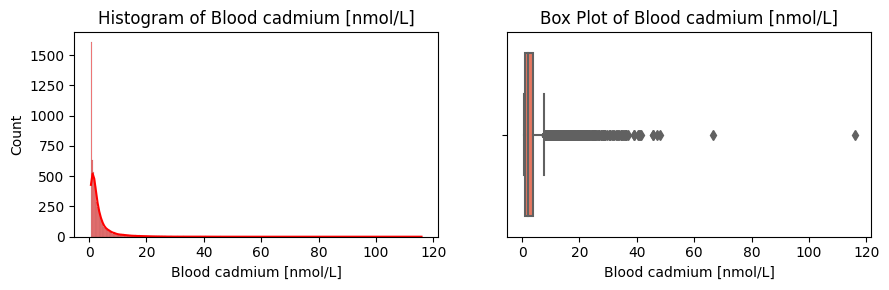

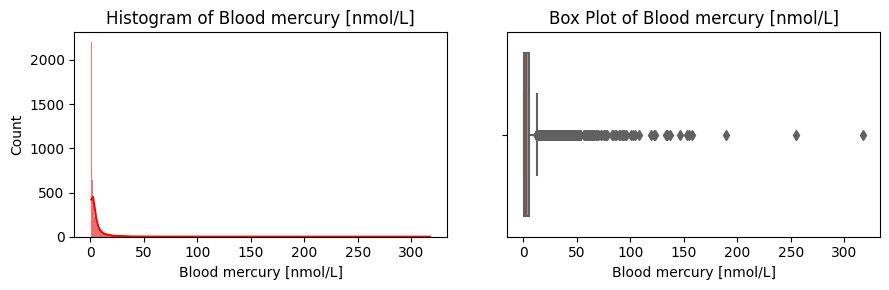

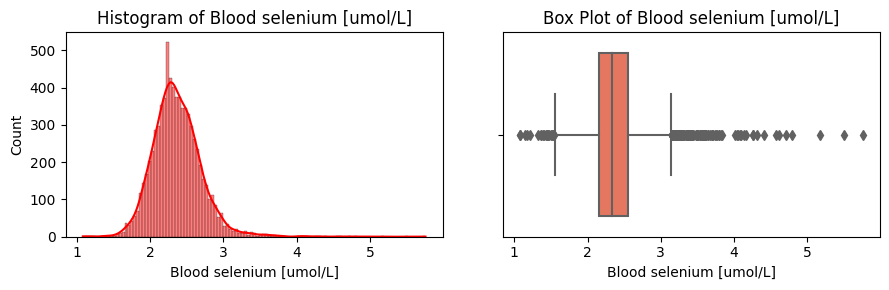

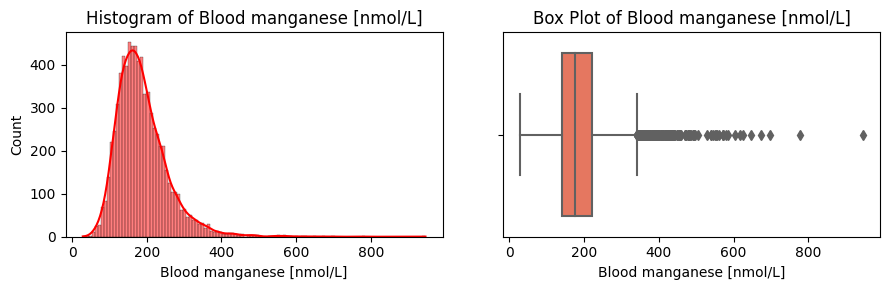

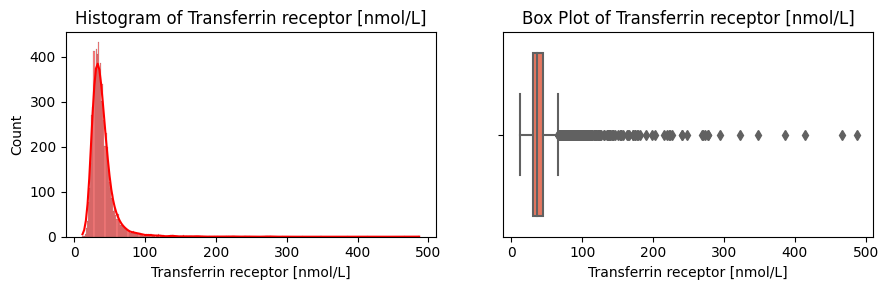

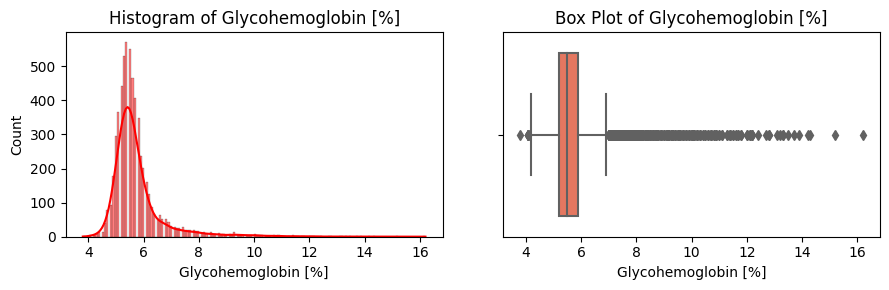

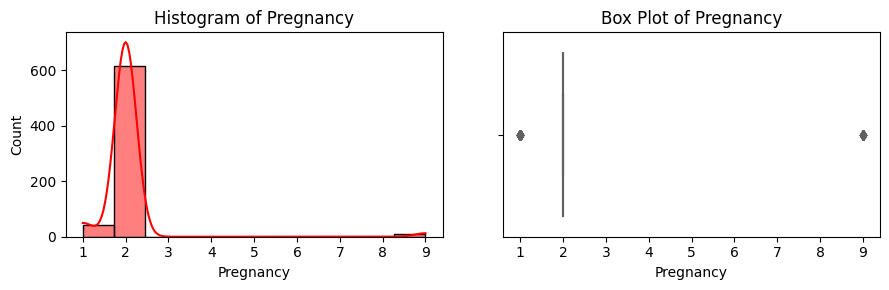

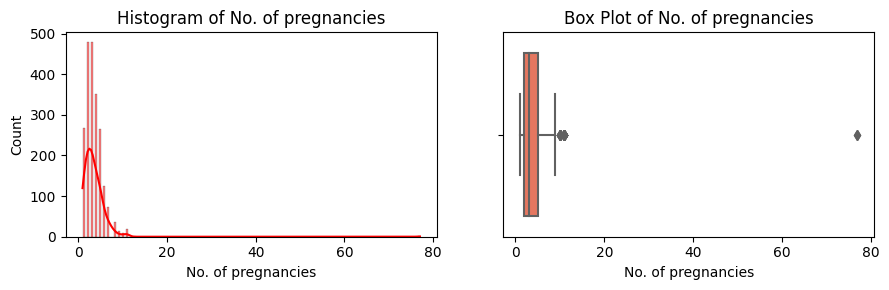

In [43]:
# Univariate Analysis of Lab Variables

for column in lab_df.drop('Respondent ID', axis=1):
    plt.figure(figsize=(9,3))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=lab_df, x=column, kde=True, color='red')
    plt.title(f'Histogram of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=lab_df, x=column, palette='Reds')
    plt.title(f'Box Plot of {column}')
    
    plt.tight_layout(w_pad = 4)
    plt.show()

In [211]:
# Percentage of null values in the questionnaire data (diseases)
q_df.isnull().sum()/len(q_df)*100

Respondent ID                 0.000000
Hepatitis C                  11.453299
Congestive_Heart_Failure     37.405867
Coronary_Heart_Disease       37.405867
Stroke                       37.405867
Thyroid_Problem              37.405867
Liver_Condition              37.405867
Fatty_Liver                  98.415196
Liver_Fibrosis               99.932562
Liver_Cirrhosis              99.730246
Viral_Hepatitis              99.438013
Autoimmune_Hepatitis         99.865123
Jaundice                     11.453299
Cancer                       37.405867
Cancer_Type                  93.391031
Anemia                        0.000000
Heart_Attack                 37.405867
Weak/Failing kidneys         37.405867
Gestational diabetes         76.250421
Diabetes                      0.000000
Hepatitis A antibody         19.781949
Hepatitis B core antibody    23.637181
dtype: float64

<a href="https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/MCQ_J.htm#Codebook" target="_blank" rel="noopener">Questionnaire Variabeles Reference</a>

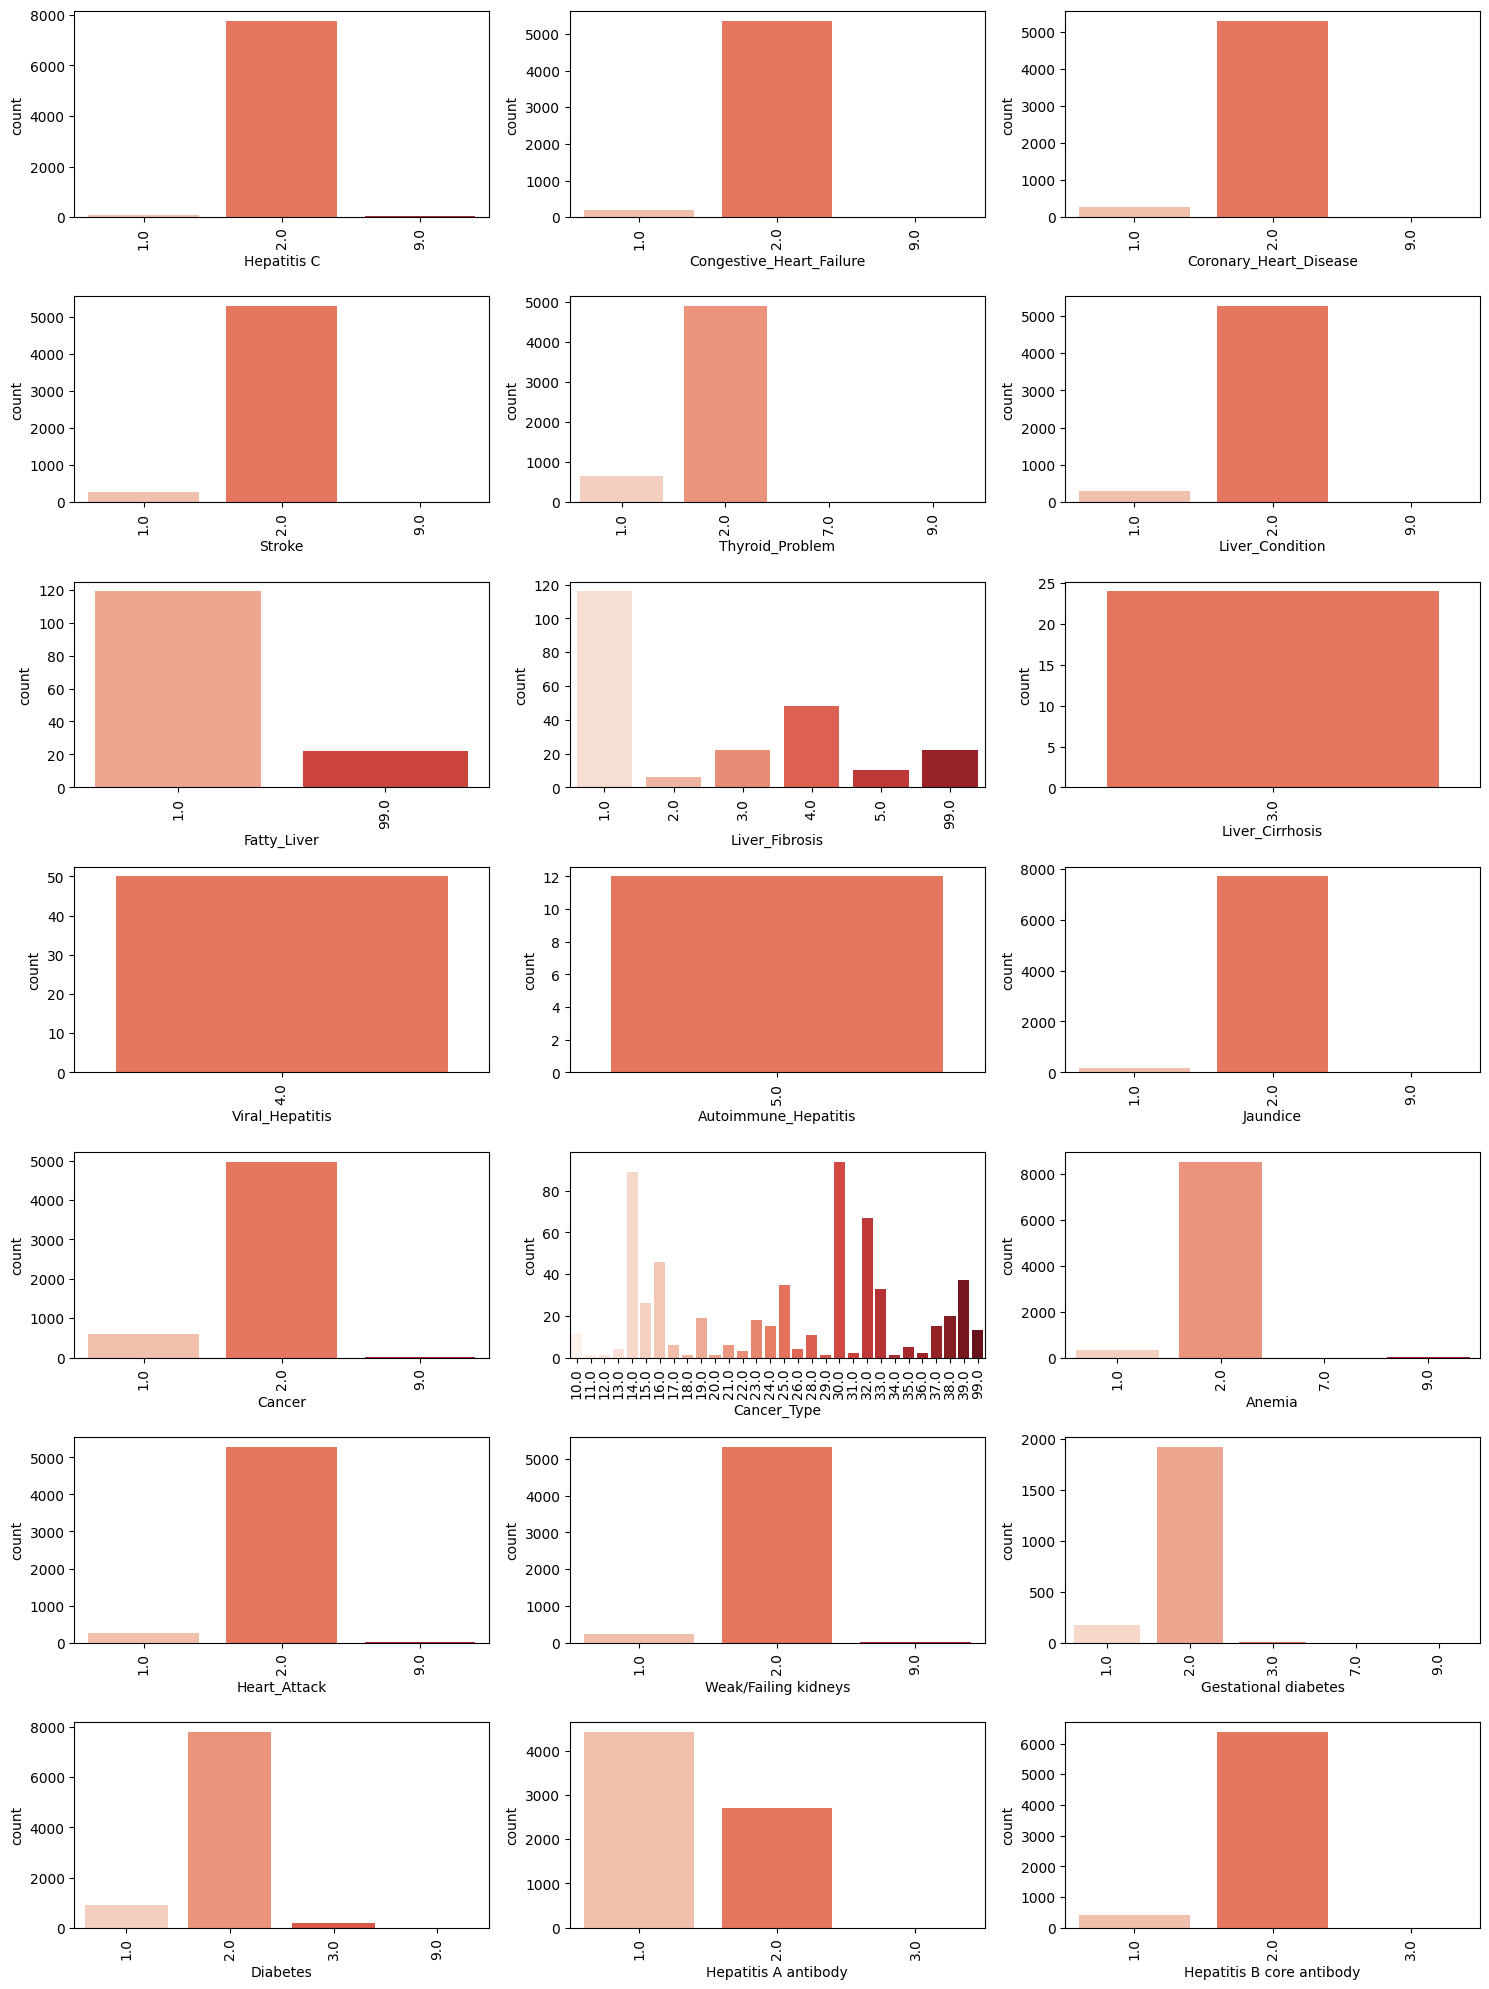

In [255]:
# Univariate analysis for disease data

num_plots = 22
num_rows = 7
num_cols = 3

# Create subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))


for i, column in enumerate(q_df.drop('Respondent ID', axis=1).columns):
    row = i // num_cols
    col = i % num_cols

    sns.countplot(data=q_df, x=column, ax=axes[row][col], palette='Reds')
    axes[row][col].set_xticklabels(axes[row][col].get_xticklabels(), rotation=90)
    
# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Here 1 denotes positive, 2 denotes negative and 99 or 9 denotes don't know etc.
# We can see that positive cases are always lower compared to negative cases
# Hence there is a class imbalance
# Also we have multiple classes like in cancer type
# We could also merge the Liver diseases into one column to make it multiclasss
# And in Liver Cirrhosis, Viral Hepatitis and Autoimmune Hepatitis, there is just positive and null values
# (which is why the graphs are filled for these)